<a href="https://colab.research.google.com/github/MarlaLorrani18/Desafio---Horus-/blob/main/desafio_horus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pacotes
import pandas as pd
import seaborn as srn
import numpy as np

In [ ]:
#importando a base de dados
desafio = pd.read_excel("dados_desafio.xlsx")

A base de dados contém 27 variáveis e 117.171 pedidos relacionadas a informações de vendas de produtos de uma determinada empresa em 2016, 2017 e 2018.

In [ ]:
#tamanho da base de dados
desafio.shape

(117171, 28)

Analisando os clientes, temos que no período estudado a empresa atendeu a 97.802 clientes diferentes.

In [ ]:
len(desafio["cliente_id"].unique())

97802

A empresa teve 114.705 pedidos entregues, 1.164 pedidos enviados, 553 cancelados, 370 em processamento, 369 faturados, 7 indisponíveis e 3 aprovados.

In [ ]:
status_pedido_agrupado = desafio.groupby(['status_pedido']).size()
status_pedido_agrupado.sort_values(ascending=False)

status_pedido
delivered      114705
shipped          1164
canceled          553
processing        370
invoiced          369
unavailable         7
approved            3
dtype: int64

Analisando o preço dos produtos vendidos, temos que: o preço mínimo foi de 0,85, o preço máximo de 6.735,00. O preço médio é de 120,52, enquanto a mediana tem um valor de 74,90, indicando uma assimetria positiva, ou seja, há mais produtos vendidos com preços muito altos, puxando a média para cima. 25% dos itens vendidos tinham preços de até 39,90 e 75% preços até 134,20.

In [ ]:
desafio['preco'].describe().round(2)

count    117171.00
mean        120.52
std         183.02
min           0.85
25%          39.90
50%          74.90
75%         134.20
max        6735.00
Name: preco, dtype: float64

O boxplot abaixo, além das interpretações dadas acima, expõe uma quantidade significativa de outliers.

Text(0.5, 1.0, 'preco')

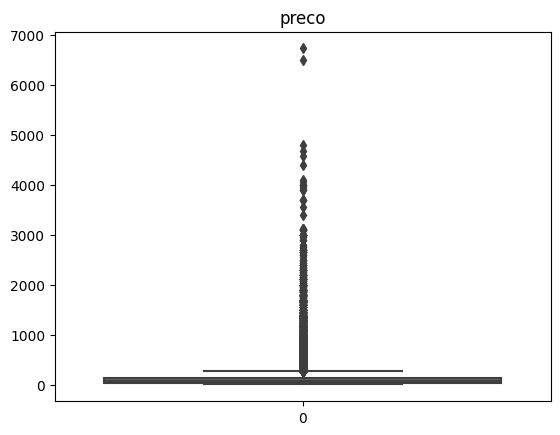

In [ ]:
srn.boxplot(desafio['preco']).set_title('preco')

Quanto ao frete da entrega, o valor mínimo foi de 0,00 (entrega grátis), o máximo de 409,68, o valor médio do frete foi de 20,03, enquanto a médiana foi de 16,28, também indicando uma assimetria positiva, ou seja, fretes mais altos puxando a média para cima. 25% dos fretes custavam até 13,08, e 75% até 21,18.

In [ ]:
desafio['valor_frete'].describe().round(2)

count    117171.00
mean         20.03
std          15.83
min           0.00
25%          13.08
50%          16.28
75%          21.18
max         409.68
Name: valor_frete, dtype: float64

Em relação ao valor do frete, também é possível identificar uma quantidade significativa de outliers, além das interpretações acima.

Text(0.5, 1.0, 'valor_frete')

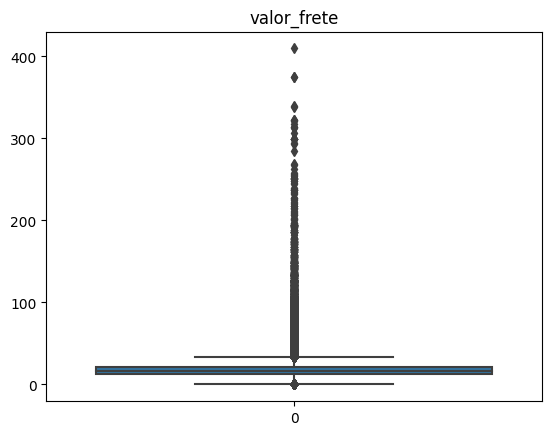

In [ ]:
srn.boxplot(desafio['valor_frete']).set_title('valor_frete')

O tipo de pagamento mais frequente foi o cartão de crédito, seguido pelo boleto, voucher e cartão de débito.

In [ ]:
tipo_pagamento_agrupado = desafio.groupby(['tipo_pagamento']).size()
tipo_pagamento_agrupado.sort_values(ascending=False)

tipo_pagamento
credit_card    86406
boleto         22802
voucher         6271
debit_card      1692
dtype: int64

<Axes: xlabel='tipo_pagamento'>

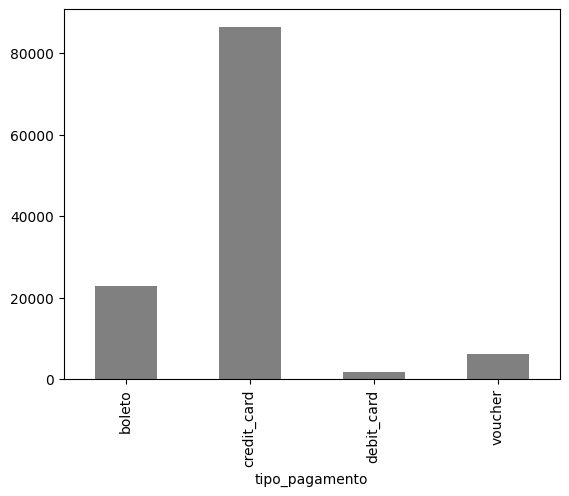

In [ ]:
tipo_pagamento_agrupado.plot.bar(color = ['gray'])

71,50% dos pedidos tiveram pagamentos de 1 a 3 prestações.

In [ ]:
pagamento_prestacoes_agrupado = desafio.groupby(['pagamento_prestacoes']).size()
pagamento_prestacoes_agrupado.sort_values(ascending=False)

pagamento_prestacoes
1     58429
2     13631
3     11712
4      7945
10     6830
5      5998
8      5058
6      4607
7      1819
9       713
12      164
15       91
18       38
24       34
11       22
20       20
13       19
14       16
16        7
17        7
21        6
0         3
22        1
23        1
dtype: int64

O valor do pagamento variou de 0,00 até 13.664,08, em média foi de 172,00, e 50% dos clientes pagaram até 108,10. Também apresentando assimetria positiva.

In [ ]:
desafio['pagamento_valor'].describe().round(2)

Analisando visualmente, também é possível indicar a presença de outliers.

Text(0.5, 1.0, 'pagamento_valor')

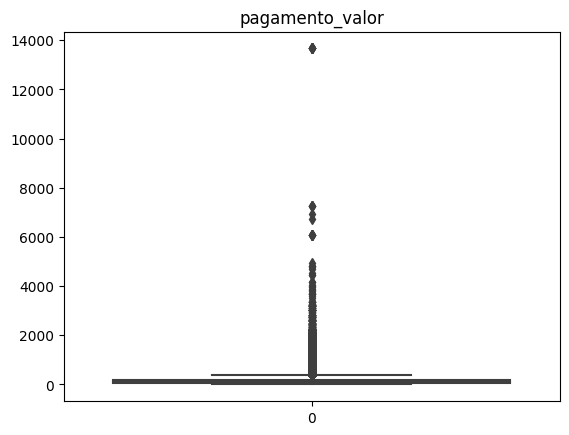

In [ ]:
srn.boxplot(desafio['pagamento_valor']).set_title('pagamento_valor')

Quanto ao score de avaliação, 66.192 clientes avaliaram com nota 5, 22.254 com nota 4 e 28.725 com notas abaixo de 4.

In [ ]:
score_avaliacao_agrupado = desafio.groupby(['score_avaliacao']).size()
score_avaliacao_agrupado.sort_values(ascending=False)

In [ ]:
score_avaliacao_agrupado.plot.bar(color = 'gray')

Os clientes que mais compraram são dos estado de São Paulo (49.457), seguido por clientes do Rio de Janeiro (15.192) e Minas Gerais (13.597). Os cinco estados com menos compras foram: Rondônia, Amazonas, Acre, Amapá e Roraima, todos da região Norte do país.

In [ ]:
estado_cliente_agrupado = desafio.groupby(['estado_cliente']).size()
estado_cliente_agrupado.sort_values(ascending=False)

Em relação ao estado do vendedor, as maiores frequências estão no estado de São Paulo, Minas Gerais e Paraná. E as menores em Pará, Amazonas e Acre, ainda estados da Região Norte.

In [ ]:
estado_vendedor_agrupado = desafio.groupby(['estado_vendedor']).size()
estado_vendedor_agrupado.sort_values(ascending=False)

Abaixo estão, em ordem de avaliação do pedido, os vendedores que apresentaram as notas mais altas até os vendedores com as notas mais baixas.

In [ ]:
novo_banco = desafio.groupby(['id_vendedor']).agg({'score_avaliacao': 'mean'}).reset_index()

In [ ]:
novo_banco.sort_values(by = "score_avaliacao", ascending=False)

Os clientes de São Paulo gastaram na empresa no período estudado 5.434.348,00. Os clientes do estado que menos compraram foram os de Roraima.

In [ ]:
novo_banco3 = desafio.groupby(['estado_cliente']).agg({'preco': 'sum'}).reset_index()
novo_banco3.sort_values(by = "preco", ascending=False)

De acordo com os estados dos vendedores da empresa, São Paulo foi o que apresentou maior faturamento, sendo de 9.071.074,91, e o menor foi o estado do Acre, com um saldo de 267,00.

In [ ]:
novo_banco4 = desafio.groupby(['estado_vendedor']).agg({'preco': 'sum'}).reset_index()
novo_banco4.sort_values(by = "preco", ascending=False)

Recategorizando a variável "categorias", de acordo com a similaridade dos produtos.

In [ ]:
# Recategorizando

desafio.loc[desafio['categoria'].isin(['alimentos','alimentos_bebidas','bebidas']), 'categorias_2'] = "alimentos"
desafio.loc[desafio['categoria'].isin(['artes','artes_e_artesanato','artigos_de_festas', 'artigos_de_natal']),
            'categorias_2'] = "artes_decoracao"
desafio.loc[desafio['categoria'].isin(['consoles_games',
                                       'eletronicos', 'informatica_acessorios',
                                       'pc_gamer', 'pcs', 'tablets_impressao_imagem',
                                       'telefonia', ]), 'categorias_2'] = "eletronicos"
desafio.loc[desafio['categoria'].isin(['audio', 'cds_dvds_musicais', 'dvds_blu_ray', 'musica']), 'categorias_2'] = "musica"
desafio.loc[desafio['categoria'].isin(['casa_construcao', 'construcao_ferramentas_construcao',
                                       'construcao_ferramentas_ferramentas', 'construcao_ferramentas_iluminacao',
                                       'construcao_ferramentas_jardim', 'construcao_ferramentas_seguranca',
                                       'ferramentas_jardim']), 'categorias_2'] = "construcao_ferramentas"
desafio.loc[desafio['categoria'].isin(['eletrodomesticos','eletrodomesticos_2','eletroportateis',
                                       'portateis_casa_forno_e_cafe', 'portateis_cozinha_e_preparadores_de_alimentos',
                                       'utilidades_domesticas']), 'categorias_2'] = "casa_eletrodomesticos"
desafio.loc[desafio['categoria'].isin(['beleza_saude','fashion_bolsas_e_acessorios','fashion_calcados',
                                       'fashion_esporte', 'fashion_roupa_feminina', 'fashion_roupa_infanto_juvenil',
                                       'fashion_roupa_masculina', 'fashion_underwear_e_moda_praia',
                                       'fraldas_higiene', 'perfumaria']), 'categorias_2'] = "beleza_higiene"
desafio.loc[desafio['categoria'].isin(['alimentos','alimentos_bebidas','bebidas']), 'categorias_2'] = "alimentos"
desafio.loc[desafio['categoria'].isin(['casa_conforto','casa_conforto_2', 'moveis_colchao_e_estofado',
                                       'moveis_cozinha_area_de_servico_jantar_e_jardim',
                                       'moveis_decoracao', 'moveis_escritorio', 'moveis_quarto', 'moveis_sala']),
            'categorias_2'] = "moveis_casa"
desafio.loc[desafio['categoria'].isin(['agro_industria_e_comercio','cine_foto','climatizacao',
                                       'flores', 'industria_comercio_e_negocios', 'instrumentos_musicais',
                                       'la_cuisine', 'malas_acessorios', 'market_place', 'seguros_e_servicos',
                                       'sinalizacao_e_seguranca', '']), 'categorias_2'] = "outros"
desafio.loc[desafio['categoria'].isin(['livros_importados','livros_interesse_geral','livros_tecnicos']),
            'categorias_2'] = "livros"
desafio.loc[desafio['categoria'].isin(['automotivo']), 'categorias_2'] = "automotivo"
desafio.loc[desafio['categoria'].isin(['bebes']), 'categorias_2'] = "bebes"
desafio.loc[desafio['categoria'].isin(['brinquedos']), 'categorias_2'] = "brinquedos"
desafio.loc[desafio['categoria'].isin(['cool_stuff']), 'categorias_2'] = "cool_stuff"
desafio.loc[desafio['categoria'].isin(['esporte_lazer']), 'categorias_2'] = "esporte_lazer"
desafio.loc[desafio['categoria'].isin(['papelaria']), 'categorias_2'] = "papelaria"
desafio.loc[desafio['categoria'].isin(['pet_shop']), 'categorias_2'] = "pet_shop"
desafio.loc[desafio['categoria'].isin(['relogios_presentes']), 'categorias_2'] = "relogios_presentes"
desafio.loc[desafio['categoria'].isin(['cama_mesa_banho']), 'categorias_2'] = "cama_mesa_banho"

In [ ]:
categorias_2_agrupado = desafio.groupby(['categorias_2']).size()
categorias_2_agrupado.sort_values(ascending=False)

Estudando as variáveis de tempo, selecionamos os pedidos com horas completas (com data e horário não nulos). A variável tempo de entrega foi criada com o tempo da entrega estimada menos a hora do pedido.

In [ ]:
df_horas = desafio.dropna(subset = ['data_hora_pedido','pedido_aprovado',
                               'pedido_com_entregador','pedido_entregue',
                               'estimada_entrega'])

df_horas['data_hora_pedido'] = pd.to_datetime(df_horas['data_hora_pedido'], format="%Y-%m-%d %H:%M:%S")
df_horas['pedido_aprovado'] = pd.to_datetime(df_horas['pedido_aprovado'], format="%Y-%m-%d %H:%M:%S")
df_horas['pedido_com_entregador'] = pd.to_datetime(df_horas['pedido_com_entregador'], format="%Y-%m-%d %H:%M:%S")
df_horas['pedido_entregue'] = pd.to_datetime(df_horas['pedido_entregue'], format="%Y-%m-%d %H:%M:%S")
df_horas['estimada_entrega'] = pd.to_datetime(df_horas['estimada_entrega'], format="%Y-%m-%d %H:%M:%S")

df_horas['tempo_de_entrega'] = df_horas['estimada_entrega']-df_horas['data_hora_pedido']



Em relação ao tempo de entrega, foram feitas duas analises com as categorias de produtos, com a variável inicial e com a variável recategorizada. Com as categorias iniciais (tendo um total de 73 divisões), movéis de escritório apresentavam o maior tempo até a entrega, 31 dias, e o menor tempo era da classe de arte e artesanato, 11 dias. Após a recategorização, moveis da casa passaram a ter o meior tempo de entrega, 25 dias, e alimentos, o menor, 20 dias.

In [ ]:
df_horas[['categoria','tempo_de_entrega']].groupby(by = ['categoria']).mean().sort_values(by = "tempo_de_entrega",
ascending=False)

In [ ]:
df_horas[['categorias_2','tempo_de_entrega']].groupby(by = ['categorias_2']).mean().sort_values(by = "tempo_de_entrega",
ascending=False)

Analisando o preço médio das vendas por categoria, antes da recategorização, a classe de produtos com maior média de preços foi "pcs", 1.078,56, e a menor "casa_conforto_2". De acordo com a recategorização, "relogios e presentes" apresentaram a maior média de 202,20, e a menor média foi da categoria "Alimentos", 26,23.

In [ ]:
novo_banco5 = desafio.groupby(['categoria']).agg({'preco': 'mean'}).reset_index()
novo_banco5.sort_values(by = "preco", ascending=False).round(2)

In [ ]:
novo_banco6 = desafio.groupby(['categorias_2']).agg({'preco': 'mean'}).reset_index()
novo_banco6.sort_values(by = "preco", ascending=False).round(2)

Estudando a quantidade de compra de "pcs" por estado do cliente, temos que houveram 68 compras por clientes em São Paulo, sendo o estado com maior quantidade, e o estado com menor número de clientes que compraram "pcs" foram Acre, Mato Grosso do Sul, Amapá, Amazonas, Tocantins, com 1 compra.

In [ ]:
teste = desafio[desafio["categoria"]=="pcs"]
teste.groupby(['estado_cliente']).agg({'categoria': 'count'}).sort_values(by = "categoria", ascending=False).round(2)

In [ ]:
novo_banco8 = desafio.groupby(['categorias_2']).agg({'preco': 'mean'}).reset_index()
novo_banco8.sort_values(by = "preco", ascending=False).round(2)